<a href="https://colab.research.google.com/github/aadityadamle/Admit-Prediction/blob/master/Admit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# loading the data from csv file saved at the url
data = pd.read_csv("https://raw.githubusercontent.com/aadityadamle/Admit-Prediction/master/Admission_Predict_Ver1.1.csv")

In [3]:
# observing the data with the first 5 rows 
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# finding the no. of rows and columns in the dataset
data.shape

(500, 9)

In [5]:
# deleting the rows which have "na" values which means absence of data 
data = data.dropna()

In [6]:
# the shape of data is unchanged which means there are zero "na" and hence data.dropna() had no effect 
data.shape

(500, 9)

In [7]:
# we have a default index and hence we don't need the "Serial No." column whose index is "0"
data.columns[0]

'Serial No.'

In [8]:
# hence we use drop function to delete the column
data.drop(data.columns[0],axis = 1, inplace = True)

In [9]:
# after deleting the column we again observe the dataset
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
# Viewing the final columns which we'll use for prediction
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
# Separating X from data
X = data.iloc[:,:7]

In [12]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [13]:
# Separating Y from data
Y = data.iloc[:,7:]

In [14]:
Y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [15]:
# Using train_test_split to split the data for tarining and testing 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state = 0)

In [16]:
# Loading the classifier from the sklearn
classifier = LinearRegression()

In [17]:
# Fitting the classifier onto the training data
classifier.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

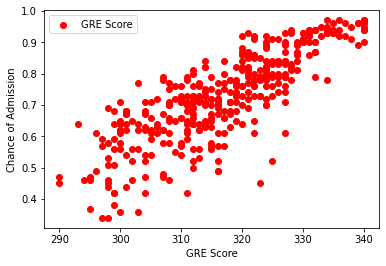

In [18]:
# Visualize the effect of GRE Score on chance of of getting an admit. We see an increasing plot which shows higher GRE Score increases the chances of admission. 
plt.scatter(X_train["GRE Score"],Y_train, color = "red")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.legend(["GRE Score"])
plt.show()

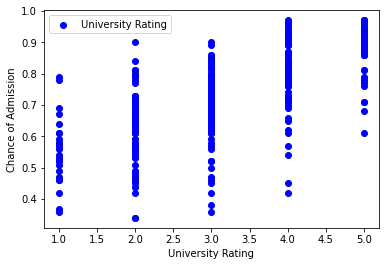

In [19]:
# Visulize the University Rating vs. Chance of Admission. This plot shows that Universities with average rating(2.0 - 4.0) have high no. of admissions 
# signified by density of dots. Because nobody applies in universities with low ratings and those with high ratings have low acceptance rate in general.   
plt.scatter(X_train["University Rating"],Y_train, color = "blue")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admission")
plt.legend(["University Rating"])
plt.show()

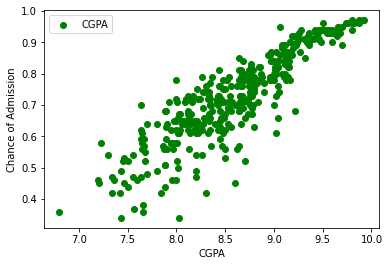

In [20]:
# Visualize the effect of CGPA on chance of of getting an admit. We can clearly see that higher CGPA has higher chance of admission.
plt.scatter(X_train["CGPA"],Y_train, color = "green")
plt.xlabel("CGPA")
plt.ylabel("Chance of Admission")
plt.legend(["CGPA"])
plt.show()

In [21]:
#Using the classifier to predict the test data and storing it in prediction_of_y array
prediction_of_Y = classifier.predict(X_test)

In [22]:
prediction_of_Y

array([[0.65975096],
       [0.83294571],
       [0.77782128],
       [0.87880993],
       [0.60173406],
       [0.64502738],
       [0.53132327],
       [0.69353416],
       [0.52531517],
       [0.74728773],
       [0.612947  ],
       [0.70978457],
       [0.62315467],
       [0.75359963],
       [0.88362883],
       [0.51045588],
       [0.82256853],
       [0.64583472],
       [0.76625281],
       [0.53339105],
       [0.51516376],
       [0.72205954],
       [0.52044417],
       [0.92038429],
       [0.83305155],
       [0.72521724],
       [0.70065949],
       [0.50954091],
       [0.58288457],
       [0.59567607],
       [0.72610563],
       [0.48480355],
       [0.65293521],
       [0.839799  ],
       [0.56549766],
       [0.59542651],
       [0.84407308],
       [0.86619206],
       [0.59104477],
       [0.65947534],
       [0.66910836],
       [0.90058613],
       [0.86561785],
       [0.72146196],
       [0.77348686],
       [0.80604453],
       [0.96926279],
       [0.849

In [23]:
# Comparision of predicted data(prediction_of_Y) and actual data(Y_test)
print(Y_test)
print(pd.DataFrame(prediction_of_Y))

     Chance of Admit 
90               0.64
254              0.85
283              0.80
445              0.91
461              0.68
..                ...
430              0.74
49               0.78
134              0.89
365              0.86
413              0.49

[125 rows x 1 columns]
            0
0    0.659751
1    0.832946
2    0.777821
3    0.878810
4    0.601734
..        ...
120  0.659208
121  0.758889
122  0.885316
123  0.844207
124  0.613066

[125 rows x 1 columns]


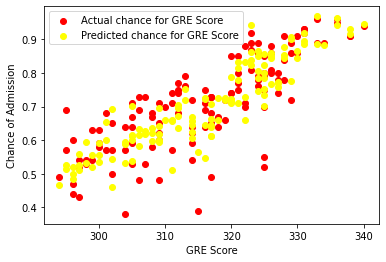

In [24]:
# Visualize the difference in graph for same parameter "GRE Score" for actual chance & prediction chance. In this plot we understand how GRE Score parameter 
# which is same produces different effect for predicted value than for actual value. The red dots at the bottom of the graph are outliers for our model.  
plt.scatter(X_test["GRE Score"],Y_test, color = "red")
plt.scatter(X_test["GRE Score"], prediction_of_Y, color='yellow')
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admission")
plt.legend(["Actual chance for GRE Score","Predicted chance for GRE Score"])
plt.show()

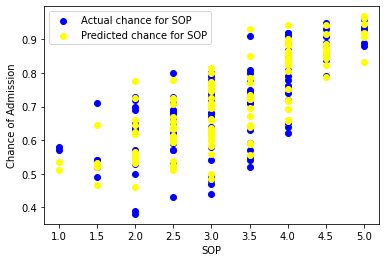

In [25]:
# Visualize the difference in graph for same parameter "SOP" for actual chance & prediction chance. This graph is more evident than above.
# Consider SOP with rating 1.0: The actual chance of admission is near 60% and predictated chance is near 50%.
# Consider SOP with rating 2.0: The actual chance of admission is lower the predited chance. And this continues for higher SOP as well.
# Hence this model shows lower chance of admit than actual for low values of SOP and higher than actual chance for high values of SOP 
# which is true as SOP is a pivotal factor in getting an admission.    
plt.scatter(X_test["SOP"],Y_test, color = "blue")
plt.scatter(X_test["SOP"], prediction_of_Y, color='yellow')
plt.xlabel("SOP")
plt.ylabel("Chance of Admission")
plt.legend(["Actual chance for SOP","Predicted chance for SOP"])
plt.show()

In [26]:
# Comparing the predicted data with actual data to get the accuracy of the model
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.80
